In [1]:
import numpy as np   
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from qhm_helper import momentum_operator, energy, potential_energy, kinetic_energy, position_expectation, position_variance, rk_step

dx = 0.02
x_min = -10
x_max = 10
x = np.arange(x_min, x_max, dx)
print(f"len(x): {len(x)}")
print(f"dx check: {x[1] - x[0]}")
m = 2.5e2
w = 2e-2
print(f"mw^2: {m*w**2}")
print(f"1/m: {1/m}")

# KE_constant = 0.00001
# PE_constant = 0.1

dt = 0.01
steps = 100000
psi_x = np.exp(0.5 * m * w * -((x-1)**2))
# psi_x = np.exp(0.5 * -((x-1)**2))
psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2) * dx)


len(x): 1000
dx check: 0.019999999999999574
mw^2: 0.1
1/m: 0.004


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
step_frequency = 1000
psi_x_t = np.zeros(shape=(step_frequency, len(psi_x)), dtype=complex)
position_expectations = np.zeros(shape=(step_frequency))
position_variances = np.zeros(shape=(step_frequency))
kinetic_energy_t = np.zeros(shape=(step_frequency))
potential_energy_t = np.zeros(shape=(step_frequency))
energy_t = np.zeros(shape=(step_frequency))
for i in range(steps):
    # H_psi = (1/(2 * m)) * momentum_operator(momentum_operator(psi_x, dx), dx) + 0.5 * (m * w ** 2) * x ** 2 * psi_x
    # psi_x = psi_x - 1j * dt * H_psi
    # psi_x = psi_x / np.sqrt(np.sum(np.abs(psi_x)**2) * dx)
    psi_x = rk_step(psi_x, x, dx, dt, m, w)

    if i % int(steps/step_frequency) == 0:
        print(f"i: {i}")
        # record psi_x
        psi_x_t[int(i/int(steps/step_frequency))] = psi_x
        position_expectations[int(i/int(steps/step_frequency))] = np.real(position_expectation(psi_x, x, dx))
        energy_t[int(i/int(steps/step_frequency))] = energy(psi_x, x, dx, m, w)
        print(f"Energy: {energy_t[int(i/int(steps/step_frequency))]}")
        print(f"Position Expectation: {position_expectations[int(i/int(steps/step_frequency))]}")
        np.save("data/psi_x_t_progress.npy", psi_x_t)

    E = energy(psi_x, dx, m, w)
    if np.real(E) > 5:
        break

<ipython-input-2-06b7b9169585>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  energy_t[int(i/int(steps/step_frequency))] = energy(psi_x, x, dx, m, w)


i: 0
Energy: 0.05999500333166712
Position Expectation: 0.9999999800399602
i: 100
Energy: 0.05999500333166714
Position Expectation: 0.9997963948189239
i: 200
Energy: 0.05999500333166714
Position Expectation: 0.9991937071457072
i: 300
Energy: 0.05999500333166715
Position Expectation: 0.9981921672382918
i: 400
Energy: 0.05999500333166715
Position Expectation: 0.9967921908677774
i: 500
Energy: 0.05999500333166714
Position Expectation: 0.9949943591285312
i: 600
Energy: 0.05999500333166712
Position Expectation: 0.9927994181172257
i: 700
Energy: 0.05999500333166714
Position Expectation: 0.9902082785212194
i: 800
Energy: 0.05999500333166713
Position Expectation: 0.9872220151168647
i: 900
Energy: 0.05999500333166713
Position Expectation: 0.9838418661784608
i: 1000
Energy: 0.05999500333166713
Position Expectation: 0.9800692327986762
i: 1100
Energy: 0.05999500333166714
Position Expectation: 0.9759056781214068
i: 1200
Energy: 0.05999500333166711
Position Expectation: 0.9713529264881327
i: 1300
Ene

In [3]:
# save psi_x_t
np.save("data/psi_x_t_progress.npy", psi_x_t)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

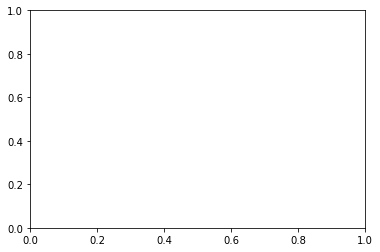

In [4]:
plt.plot(np.linspace(0, steps, int(steps/1000)), position_expectations, label="Position Expectation")
plt.xlim([0, int(steps/2)])
plt.ylim([-0.3, 0.3])
plt.legend()
plt.show()


In [ ]:

plt.plot(np.linspace(0, steps, int(steps/1000)), position_variances, label="Position Variance")
plt.legend()
plt.show()


In [ ]:

plt.plot(np.linspace(0, steps, int(steps/1000)), kinetic_energy_t, label="Kinetic Energy")
plt.legend()
plt.show()


In [ ]:

plt.plot(np.linspace(0, steps, int(steps/1000)), potential_energy_t, label="Potential Energy")
plt.show()


In [ ]:

plt.plot(np.linspace(0, steps, int(steps/1000)), energy_t, label="Energy")
plt.legend()
plt.show()